In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [166]:
#Importing dataset in company function
company = pd.read_csv("C:/Users/HP/Downloads/DA_intern_assignment.csv")
company.head()

,_id,user,chatStatus,guru,guruName,gid,uid,consultationType,website,refundStatus,...,feedback,hideHistory,cardPosition,Remedies,offer,refunds[0],source,callSeconds,complementaryCallOrganiser,disconnectedBy
0,656922f2919324acb6e87139,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65692413919324acb6e87441,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65692612919324acb6e87738,656528dcee2b1ab52f019119,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,656927c9919324acb6e87b2f,6568ee9f919324acb6e77e53,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,65692d75919324acb6e882dd,65629cfc4232eb704d712d98,failed,65054786f5f203225bfcdd0d,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
#Summary of dataset. so, we can see there discriptive measures
company.describe()

,gid,uid,chatSeconds,__v,timeDuration,amount,astrologerOnCallDuration,astrologersEarnings,netAmount,userOnCallDuration,callSeconds
count,28027.000000,28027.000000,19514.000000,28027.000000,21398.000000,9016.000000,8365.000000,9016.000000,9016.000000,8365.000000,2.000000
mean,220.890498,34846.342812,349.158553,0.000178,1.977168,23.742890,128.791871,10.996736,23.734174,118.784818,33000.000000
std,86.575346,7812.317551,319.588213,0.013356,3.340467,87.134998,245.204088,42.141543,87.134775,244.536228,38183.766184
min,8.000000,1.000000,300.000000,0.000000,-0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000
25%,195.000000,31659.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19500.000000
50%,255.000000,36213.000000,300.000000,0.000000,0.100000,0.000000,34.000000,0.000000,0.000000,8.000000,33000.000000
75%,281.000000,40109.000000,300.000000,0.000000,4.356962,0.000000,189.000000,0.000000,0.000000,180.000000,46500.000000
max,325.000000,44005.000000,7980.000000,1.000000,67.000000,1800.000000,4029.000000,900.000000,1800.000000,4020.000000,60000.000000


In [ ]:
#Checking the null values in dataset 
company.isnull().sum()

_id                               0
user                              0
chatStatus                     8512
guru                              0
guruName                          0
gid                               0
uid                               0
consultationType                  0
website                           0
refundStatus                      0
isWhiteListUser                   0
chatSeconds                    8513
queue                             0
freeCall                          0
freeChat                          0
createdAt                         0
updatedAt                         0
__v                               0
statementEntryId                151
chatStartTime                 18697
chatEndTime                   14996
timeDuration                   6629
callChannel                   19519
callIvrType                   19665
callStatus                    19486
CallSid                       19662
amount                        19011
astrologerCallStatus        

In [169]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle


In [170]:
# Task 13: Display unique region names
if 'region' in company.columns:
    unique_regions = company['region'].dropna().unique()
    print("\nUnique Regions:\n", unique_regions)
    



Unique Regions:
 ['Indian']


In [171]:
#here we can see that there is only a 'Indian' region, so no use of that column so we will drop that col
company.drop(['region'],axis=1, inplace=True)


In [173]:
company

,_id,user,chatStatus,guru,guruName,gid,uid,consultationType,website,refundStatus,...,feedback,hideHistory,cardPosition,Remedies,offer,refunds[0],source,callSeconds,complementaryCallOrganiser,disconnectedBy
0,656922f2919324acb6e87139,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65692413919324acb6e87441,65691b0c919324acb6e7e046,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65692612919324acb6e87738,656528dcee2b1ab52f019119,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,656927c9919324acb6e87b2f,6568ee9f919324acb6e77e53,incomplete,65054786f5f203225bfcdd0d,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,65692d75919324acb6e882dd,65629cfc4232eb704d712d98,failed,65054786f5f203225bfcdd0d,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28022,6595ef62849de2bb564ed9fb,6592ef86270572b0ca26a3e3,completed,6522d40f0562f2f5e506c1c4,Super Guru Ji,227,43361,Chat,gurucool,no-refund,...,NaN,False,NaN,NaN,normal,NaN,Test,NaN,NaN,user
28023,6595f1f3849de2bb564edd7e,6592ef86270572b0ca26a3e3,NaN,65054784f5f203225bfcdcd1,Tarot Rupanshi,74,43361,Call,app,no-refund,...,NaN,False,NaN,NaN,normal,NaN,Test,NaN,NaN,NaN
28024,6595f23d849de2bb564ee1c9,6592ef86270572b0ca26a3e3,NaN,65054786f5f203225bfcdd0d,Astro Sanjeev,95,43361,Call,app,no-refund,...,NaN,False,NaN,NaN,normal,NaN,Test,NaN,NaN,NaN
28025,6595f384883c1bbae79c58e3,6595f36c883c1bbae79c57c9,failed,6522d40f0562f2f5e506c1c4,Super Guru Ji,227,44005,Chat,gurucool,no-refund,...,NaN,False,NaN,NaN,first,NaN,Production,NaN,NaN,NaN


In [174]:
company.columns

Index(['_id', 'user', 'chatStatus', 'guru', 'guruName', 'gid', 'uid',
       'consultationType', 'website', 'refundStatus', 'isWhiteListUser',
       'chatSeconds', 'queue', 'freeCall', 'freeChat', 'createdAt',
       'updatedAt', '__v', 'statementEntryId', 'chatStartTime', 'chatEndTime',
       'timeDuration', 'callChannel', 'callIvrType', 'callStatus', 'CallSid',
       'amount', 'astrologerCallStatus', 'astrologerOnCallDuration',
       'astrologersEarnings', 'netAmount', 'userCallStatus',
       'userOnCallDuration', 'RecordingUrl', 'feedback', 'hideHistory',
       'cardPosition', 'Remedies', 'offer', 'refunds[0]', 'source',
       'callSeconds', 'complementaryCallOrganiser', 'disconnectedBy'],
      dtype='object')

In [175]:
# Task 13: Display unique region names
if 'isWhiteListUser' in company.columns:
    unique_isWhiteListUser = company['isWhiteListUser'].dropna().unique()
    print("\nUnique isWhiteListUser:\n", unique_isWhiteListUser)
    



Unique isWhiteListUser:
 [False]


In [176]:
cleaned_company=company

In [177]:
#here we can see that there is only a 'False' from isWhiteListUser, so no use of that column so we will drop that col
company.drop(['isWhiteListUser'],axis=1, inplace=True)

In [178]:
#dropping those column which are not specifically containing enough information like user
cleaned_company= company.drop(['_id', 'user','guru','queue','__v','statementEntryId','callChannel','callIvrType','CallSid',
                               'RecordingUrl', 'feedback', 'hideHistory','cardPosition', 'Remedies','offer','complementaryCallOrganiser',
                               'disconnectedBy'],axis=1,inplace=True)


In [ ]:
print(cleaned_company)

None


In [ ]:
output_path=r'C:/Users/HP/Downloads/cleaned_dataset.csv'
cleaned_company.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")

Cleaned data saved to C:/Users/HP/Downloads/cleaned_dataset.csv


In [ ]:
cleaned_company

,chatStatus,guruName,gid,uid,consultationType,website,refundStatus,chatSeconds,freeCall,freeChat,...,amount,astrologerCallStatus,astrologerOnCallDuration,astrologersEarnings,netAmount,userCallStatus,userOnCallDuration,refunds[0],source,callSeconds
0,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,incomplete,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,300.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,incomplete,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,300.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,failed,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,300.0,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28022,completed,Super Guru Ji,227,43361,Chat,gurucool,no-refund,2580.0,False,False,...,14.55,completed,NaN,7.275,14.55,completed,NaN,NaN,Test,NaN
28023,NaN,Tarot Rupanshi,74,43361,Call,app,no-refund,NaN,False,False,...,NaN,failed,0.0,NaN,NaN,NaN,0.0,NaN,Test,NaN
28024,NaN,Astro Sanjeev,95,43361,Call,app,no-refund,NaN,False,False,...,NaN,completed,9.0,NaN,NaN,canceled,0.0,NaN,Test,NaN
28025,failed,Super Guru Ji,227,44005,Chat,gurucool,no-refund,300.0,False,False,...,NaN,no-answer,NaN,NaN,NaN,NaN,NaN,NaN,Production,NaN


In [ ]:
# Step 1: Clean the 'chatStatus' and 'consultationType' columns based on conditions
cleaned_company['chatStatus'] = cleaned_company.apply(
    lambda row: row['chatStatus'] if row['consultationType'] == 'Chat' else None, axis=1
)
cleaned_company['consultationType'] = cleaned_company.apply(
    lambda row: 'Chat' if row['chatStatus'] in ['complete', 'incomplete', 'failed'] else row['consultationType'], axis=1
)


In [ ]:
cleaned_company['chatStatus'].fillna('oncall', inplace=True)

In [ ]:
cleaned_company.isnull().sum()

chatStatus                      0
guruName                        0
gid                             0
uid                             0
consultationType                0
website                         0
refundStatus                    0
chatSeconds                  8513
freeCall                        0
freeChat                        0
createdAt                       0
updatedAt                       0
chatStartTime               18697
chatEndTime                 14996
timeDuration                 6629
callStatus                  19486
amount                      19011
astrologerCallStatus        11769
astrologerOnCallDuration    19662
astrologersEarnings         19011
netAmount                   19011
userCallStatus              18682
userOnCallDuration          28027
refunds[0]                  28022
source                      11736
callSeconds                 28025
dtype: int64

In [ ]:
check_null=cleaned_company.isnull().sum()

In [ ]:
# Step 1: Print the DataFrame before applying the changes
print("Before applying changes:")
print(cleaned_company[['chatSeconds', 'userOnCallDuration']].head())  # Print the first few rows of relevant columns

# Step 2: Apply the condition to adjust 'useronCallDuration'
cleaned_company['userOnCallDuration'] = cleaned_company.apply(
    lambda row: None if pd.notnull(row['chatSeconds']) else row['userOnCallDuration'], axis=1
)

# Step 3: Print the DataFrame after applying the changes to see the effect
print("\nAfter applying changes:")
print(cleaned_company[['chatSeconds', 'userOnCallDuration']].head())  # Print the first few rows to check the changes

Before applying changes:
   chatSeconds  userOnCallDuration
0        300.0                 NaN
1        300.0                 NaN
2        300.0                 NaN
3        300.0                 NaN
4        300.0                 NaN

After applying changes:
   chatSeconds  userOnCallDuration
0        300.0                 NaN
1        300.0                 NaN
2        300.0                 NaN
3        300.0                 NaN
4        300.0                 NaN


In [ ]:
cleaned_company['chatSeconds'].fillna(0,inplace=True)

In [ ]:
cleaned_company['userOnCallDuration'].fillna(0,inplace=True)

In [ ]:
cleaned_company

,chatStatus,guruName,gid,uid,consultationType,website,refundStatus,chatSeconds,freeCall,freeChat,...,amount,astrologerCallStatus,astrologerOnCallDuration,astrologersEarnings,netAmount,userCallStatus,userOnCallDuration,refunds[0],source,callSeconds
0,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,incomplete,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,300.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,incomplete,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,300.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,failed,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,300.0,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28022,completed,Super Guru Ji,227,43361,Chat,gurucool,no-refund,2580.0,False,False,...,14.55,completed,NaN,7.275,14.55,completed,0.0,NaN,Test,NaN
28023,oncall,Tarot Rupanshi,74,43361,Call,app,no-refund,0.0,False,False,...,NaN,failed,0.0,NaN,NaN,NaN,0.0,NaN,Test,NaN
28024,oncall,Astro Sanjeev,95,43361,Call,app,no-refund,0.0,False,False,...,NaN,completed,9.0,NaN,NaN,canceled,0.0,NaN,Test,NaN
28025,failed,Super Guru Ji,227,44005,Chat,gurucool,no-refund,300.0,False,False,...,NaN,no-answer,NaN,NaN,NaN,NaN,0.0,NaN,Production,NaN


In [ ]:
cleaned_company['userOnCallDuration'].fillna(0, inplace=True)

In [ ]:
cleaned_company.isnull().sum()

chatStatus                      0
guruName                        0
gid                             0
uid                             0
consultationType                0
website                         0
refundStatus                    0
chatSeconds                     0
freeCall                        0
freeChat                        0
createdAt                       0
updatedAt                       0
chatStartTime               18697
chatEndTime                 14996
timeDuration                 6629
callStatus                  28027
amount                      19011
astrologerCallStatus        28027
astrologerOnCallDuration    19662
astrologersEarnings         19011
netAmount                   19011
userCallStatus              28027
userOnCallDuration              0
refunds[0]                  28022
source                      11736
callSeconds                 28025
dtype: int64

In [ ]:
cleaned_company[['userCallStatus','astrologerCallStatus','callStatus']]=cleaned_company[['userCallStatus','astrologerCallStatus','callStatus']].fillna('onchat',inplace=True)

In [ ]:
cleaned_company['astrologerCallStatus'].fillna('onchat',inplace=True)

In [ ]:
cleaned_company['userCallStatus'].fillna('onchat',inplace=True)

In [ ]:
cleaned_company['callStatus'].fillna('onchat',inplace=True)

In [ ]:
cleaned_company.isnull().sum()

chatStatus                      0
guruName                        0
gid                             0
uid                             0
consultationType                0
website                         0
refundStatus                    0
chatSeconds                     0
freeCall                        0
freeChat                        0
createdAt                       0
updatedAt                       0
chatStartTime               18697
chatEndTime                 14996
timeDuration                 6629
callStatus                      0
amount                      19011
astrologerCallStatus            0
astrologerOnCallDuration    19662
astrologersEarnings         19011
netAmount                   19011
userCallStatus                  0
userOnCallDuration              0
refunds[0]                  28022
source                      11736
callSeconds                 28025
dtype: int64

In [ ]:
cleaned_data=cleaned_company
if 'createdAt' in cleaned_data.columns:
    cleaned_data['createdAt'] = pd.to_datetime(cleaned_data['createdAt'], errors='coerce')  # Convert to datetime
    median_date = cleaned_data['createdAt'].mean()  # Calculate mean date
    cleaned_data['createdAt'] = cleaned_data['createdAt'].fillna(median_date)  # Fill missing values with mean date
    cleaned_data['createdAt'] = cleaned_data['createdAt'].dt.strftime('%d-%m-%Y')
cleaned_data['createdAt']

0        01-12-2023
1        01-12-2023
2        01-12-2023
3        01-12-2023
4        01-12-2023
            ...    
28022    03-01-2024
28023    03-01-2024
28024    03-01-2024
28025    03-01-2024
28026    03-01-2024
Name: createdAt, Length: 28027, dtype: object

In [ ]:
cleaned_data=cleaned_company
if 'updatedAt' in cleaned_data.columns:
    cleaned_data['updatedAt'] = pd.to_datetime(cleaned_data['updatedAt'], errors='coerce')  # Convert to datetime
    median_date = cleaned_data['updatedAt'].mean()  # Calculate mean date
    cleaned_data['updatedAt'] = cleaned_data['updatedAt'].fillna(median_date)  # Fill missing values with mean date
    cleaned_data['updatedAt'] = cleaned_data['updatedAt'].dt.strftime('%d-%m-%Y')
cleaned_data['updatedAt']

0        01-12-2023
1        01-12-2023
2        01-12-2023
3        01-12-2023
4        01-12-2023
            ...    
28022    03-01-2024
28023    03-01-2024
28024    03-01-2024
28025    03-01-2024
28026    03-01-2024
Name: updatedAt, Length: 28027, dtype: object

In [ ]:
cleaned_data.isnull().sum()

chatStatus                      0
guruName                        0
gid                             0
uid                             0
consultationType                0
website                         0
refundStatus                    0
chatSeconds                     0
freeCall                        0
freeChat                        0
createdAt                       0
updatedAt                       0
chatStartTime               18697
chatEndTime                 14996
timeDuration                 6629
callStatus                      0
amount                      19011
astrologerCallStatus            0
astrologerOnCallDuration    19662
astrologersEarnings         19011
netAmount                   19011
userCallStatus                  0
userOnCallDuration              0
refunds[0]                  28022
source                      11736
callSeconds                 28025
created_at                      0
dtype: int64

In [ ]:
cleaned_data.drop(['refunds[0]','source'],axis=1,inplace=True)

In [ ]:
cleaned_data.drop(['chatEndTime'],axis=1,inplace=True)

In [ ]:
cleaned_data=cleaned_company
if 'chatStartTime' in cleaned_data.columns:
    cleaned_data['chatStartTime'] = pd.to_datetime(cleaned_data['chatStartTime'], errors='coerce')  # Convert to datetime
    median_date = cleaned_data['chatStartTime'].mean()  # Calculate mean date
    cleaned_data['chatStartTime'] = cleaned_data['chatStartTime'].fillna(median_date)  # Fill missing values with mean date
    cleaned_data['chatStartTime'] = cleaned_data['chatStartTime'].dt.strftime('%d-%m-%Y')
cleaned_data['chatStartTime']

0        01-12-2023
1        01-12-2023
2        01-12-2023
3        01-12-2023
4        16-12-2023
            ...    
28022    03-01-2024
28023    16-12-2023
28024    16-12-2023
28025    16-12-2023
28026    03-01-2024
Name: chatStartTime, Length: 28027, dtype: object

In [ ]:
cleaned_data['timeDuration'].fillna(0,inplace=True)

In [ ]:
cleaned_data['astrologerOnCallDuration'].fillna(0,inplace=True)

In [ ]:
cleaned_data['astrologersEarnings'].()

np.float64(99146.57095000001)

In [ ]:
#checking whether the column amount and net amount contains same values 
if 'amount' in cleaned_data.columns and 'netAmount' in cleaned_data.columns:
    duplicates = cleaned_data[cleaned_data['amount'] == cleaned_data['netAmount']]
    print("\nRows where column1 equals column2:\n", duplicates)



Rows where column1 equals column2:
       chatStatus            guruName  gid    uid consultationType   website  \
7         oncall      Astro Rajesh S  241  30132             Call       app   
9         oncall    Astro  Prashant   178  29614             Call       app   
15     completed     Astro  Yogendra  201  30139             Chat  gurucool   
16     completed       Astro Shalini  256  30134             Chat  gurucool   
24     completed  Aachary  Prateek\t  236  29966             Chat  gurucool   
...          ...                 ...  ...    ...              ...       ...   
28014  completed      Super  Guru Ji  227  43361             Chat  gurucool   
28017  completed      Super  Guru Ji  227  43361             Chat  gurucool   
28019  completed      Super  Guru Ji  227  43361             Chat  gurucool   
28021  completed      Super  Guru Ji  227  43361             Chat  gurucool   
28022  completed      Super  Guru Ji  227  43361             Chat  gurucool   

      refundSt

In [ ]:
cleaned_data['amount'].count()

np.int64(9016)

In [ ]:
cleaned_data.drop(['callSeconds'],axis=1,inplace=True)

In [ ]:
cleaned_data

,chatStatus,guruName,gid,uid,consultationType,website,refundStatus,chatSeconds,freeCall,freeChat,...,timeDuration,callStatus,amount,astrologerCallStatus,astrologerOnCallDuration,astrologersEarnings,netAmount,userCallStatus,userOnCallDuration,created_at
0,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300.0,False,True,...,0.008750,onchat,NaN,onchat,0.0,NaN,NaN,onchat,0.0,2023-12-01 00:04:02.993000+00:00
1,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300.0,False,True,...,0.004067,onchat,NaN,onchat,0.0,NaN,NaN,onchat,0.0,2023-12-01 00:08:51.903000+00:00
2,incomplete,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,300.0,False,True,...,0.004217,onchat,NaN,onchat,0.0,NaN,NaN,onchat,0.0,2023-12-01 00:17:22.270000+00:00
3,incomplete,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,300.0,False,True,...,0.006733,onchat,NaN,onchat,0.0,NaN,NaN,onchat,0.0,2023-12-01 00:24:41.672000+00:00
4,failed,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,300.0,False,False,...,0.000000,onchat,NaN,onchat,0.0,NaN,NaN,onchat,0.0,2023-12-01 00:48:53.744000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28022,completed,Super Guru Ji,227,43361,Chat,gurucool,no-refund,2580.0,False,False,...,1.616667,onchat,14.55,onchat,0.0,7.275,14.55,onchat,0.0,2024-01-03 23:36:02.872000+00:00
28023,oncall,Tarot Rupanshi,74,43361,Call,app,no-refund,0.0,False,False,...,0.000000,onchat,NaN,onchat,0.0,NaN,NaN,onchat,0.0,2024-01-03 23:46:59.765000+00:00
28024,oncall,Astro Sanjeev,95,43361,Call,app,no-refund,0.0,False,False,...,0.000000,onchat,NaN,onchat,9.0,NaN,NaN,onchat,0.0,2024-01-03 23:48:13.271000+00:00
28025,failed,Super Guru Ji,227,44005,Chat,gurucool,no-refund,300.0,False,False,...,0.000000,onchat,NaN,onchat,0.0,NaN,NaN,onchat,0.0,2024-01-03 23:53:40.997000+00:00


In [ ]:
key_columns = ['amount', 'userOnCallDuration', 'timeDuration','netAmount' 'astrologersEarnings']
for col in key_columns:
    if col in cleaned_data.columns:
        cleaned_data[col] = cleaned_data[col].fillna(0) 

In [ ]:
cleaned_data['astrologersEarnings'].describe()

count    28027.000000
mean         3.537538
std         24.446619
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        900.000000
Name: astrologersEarnings, dtype: float64

In [ ]:
cleaned_data.isnull().sum()


chatStatus                  0
guruName                    0
gid                         0
uid                         0
consultationType            0
website                     0
refundStatus                0
chatSeconds                 0
freeCall                    0
freeChat                    0
createdAt                   0
chatStartTime               0
timeDuration                0
callStatus                  0
amount                      0
astrologerCallStatus        0
astrologerOnCallDuration    0
astrologersEarnings         0
netAmount                   0
userCallStatus              0
userOnCallDuration          0
created_at                  0
dtype: int64

In [ ]:
cleaned_data['netAmount'].fillna(0,inplace=True)

In [ ]:
cleaned_data

,chatStatus,guruName,gid,uid,consultationType,website,refundStatus,chatSeconds,freeCall,freeChat,...,timeDuration,callStatus,amount,astrologerCallStatus,astrologerOnCallDuration,astrologersEarnings,netAmount,userCallStatus,userOnCallDuration,created_at
0,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300.0,False,True,...,0.008750,onchat,0.00,onchat,0.0,0.000,0.00,onchat,0.0,2023-12-01 00:04:02.993000+00:00
1,incomplete,Astro Sanjeev,95,30129,Chat,gurucool,no-refund,300.0,False,True,...,0.004067,onchat,0.00,onchat,0.0,0.000,0.00,onchat,0.0,2023-12-01 00:08:51.903000+00:00
2,incomplete,Astro Sanjeev,95,28743,Chat,gurucool,no-refund,300.0,False,True,...,0.004217,onchat,0.00,onchat,0.0,0.000,0.00,onchat,0.0,2023-12-01 00:17:22.270000+00:00
3,incomplete,Astro Sanjeev,95,30120,Chat,gurucool,no-refund,300.0,False,True,...,0.006733,onchat,0.00,onchat,0.0,0.000,0.00,onchat,0.0,2023-12-01 00:24:41.672000+00:00
4,failed,Astro Sanjeev,95,27790,Chat,gurucool,no-refund,300.0,False,False,...,0.000000,onchat,0.00,onchat,0.0,0.000,0.00,onchat,0.0,2023-12-01 00:48:53.744000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28022,completed,Super Guru Ji,227,43361,Chat,gurucool,no-refund,2580.0,False,False,...,1.616667,onchat,14.55,onchat,0.0,7.275,14.55,onchat,0.0,2024-01-03 23:36:02.872000+00:00
28023,oncall,Tarot Rupanshi,74,43361,Call,app,no-refund,0.0,False,False,...,0.000000,onchat,0.00,onchat,0.0,0.000,0.00,onchat,0.0,2024-01-03 23:46:59.765000+00:00
28024,oncall,Astro Sanjeev,95,43361,Call,app,no-refund,0.0,False,False,...,0.000000,onchat,0.00,onchat,9.0,0.000,0.00,onchat,0.0,2024-01-03 23:48:13.271000+00:00
28025,failed,Super Guru Ji,227,44005,Chat,gurucool,no-refund,300.0,False,False,...,0.000000,onchat,0.00,onchat,0.0,0.000,0.00,onchat,0.0,2024-01-03 23:53:40.997000+00:00


In [ ]:

summary_stats = cleaned_data.describe()
print(summary_stats)

                gid           uid  chatSeconds  timeDuration        amount  \
count  28027.000000  28027.000000  28027.00000  28027.000000  28027.000000   
mean     220.890498  34846.342812    243.10415      1.509525      7.637846   
std       86.575346   7812.317551    311.28032      3.037316     50.648404   
min        8.000000      1.000000      0.00000     -0.166667      0.000000   
25%      195.000000  31659.000000      0.00000      0.000000      0.000000   
50%      255.000000  36213.000000    300.00000      0.000000      0.000000   
75%      281.000000  40109.000000    300.00000      3.000000      0.000000   
max      325.000000  44005.000000   7980.00000     67.000000   1800.000000   

       astrologerOnCallDuration  astrologersEarnings     netAmount  \
count              28027.000000         28027.000000  28027.000000   
mean                  38.439505             3.537538      7.635042   
std                  146.344703            24.446619     50.647389   
min              

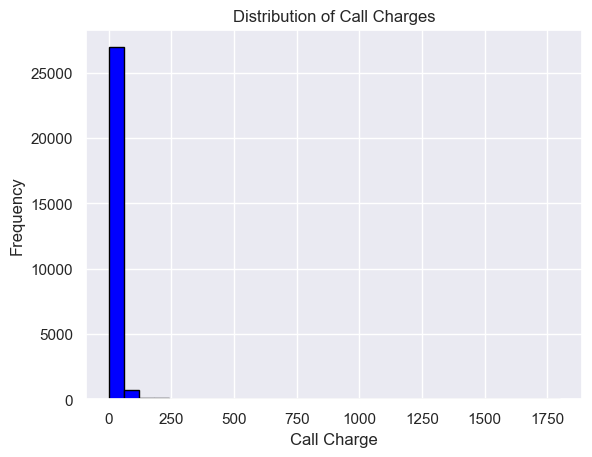

In [202]:
if 'amount' in data.columns:
    plt.hist(data['amount'], bins=30, color='blue', edgecolor='black')
    plt.title('Distribution of Call Charges')
    plt.xlabel('Call Charge')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# 5: Average TalkTime by activity


In [ ]:
print("\nAverage time spent by Astrologer on Call:\n",cleaned_data['astrologerOnCallDuration'].mean())
print("\nAverage time spent by Astrologer on Chat:\n",cleaned_data['chatSeconds'].mean())


Average time spent by Astrologer on Call:
 38.439504763264

Average time spent by Astrologer on Chat:
 243.10414957005744


In [ ]:
# 6: Most common source of calls
if 'website' in cleaned_data.columns:
    most_common_source = cleaned_data['website'].value_counts().idxmax()
    print("\nMost Common Source of Calls:", most_common_source)


Most Common Source of Calls: gurucool


In [ ]:
cleaned_data['userOnCallDuration']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
28022    0.0
28023    0.0
28024    0.0
28025    0.0
28026    0.0
Name: userOnCallDuration, Length: 28027, dtype: float64

In [ ]:
#  7: Total earnings and spending
if 'amount' in cleaned_data.columns and 'astrologersEarnings' in cleaned_data.columns:
    total_earnings = cleaned_data['astrologersEarnings'].sum()
    total_spending = cleaned_data['amount'].sum()
    print("\nTotal Earnings:", total_earnings)
    print("Total Spending:", total_spending)


Total Earnings: 99146.57095000001
Total Spending: 214065.89866666665


In [ ]:
output_path=r'C:/Users/HP/Downloads/cleaned_data.csv'
cleaned_data.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")

Cleaned data saved to C:/Users/HP/Downloads/cleaned_data.csv


In [ ]:
#Task 1: Data Exploration
# Data cleaning done here the cleaned data

data=pd.read_csv("C:/Users/HP\Downloads/cleaned_data.csv")

In [ ]:
data['astrologerOnCallDuration'].fillna(0,inplace=True)

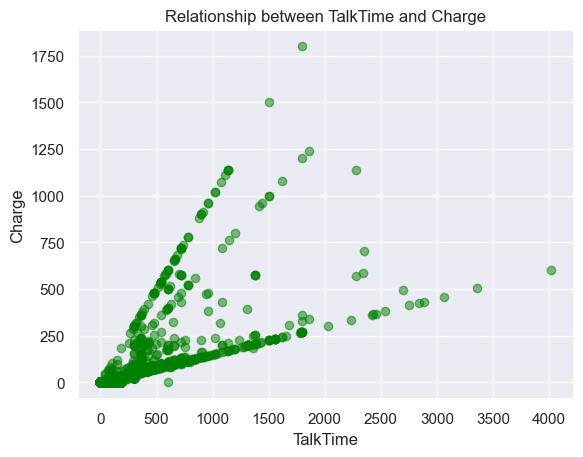

In [182]:
# 8 Relationship between TalkTime and Charge
if 'userOnCallDuration' in data.columns and 'amount' in data.columns:
    plt.scatter(data['userOnCallDuration'], data['amount'], alpha=0.5, color='green')
    plt.title('Relationship between TalkTime and Charge')
    plt.xlabel('TalkTime')
    plt.ylabel('Charge')
    plt.show()


Average Call Duration (in seconds): 118.78481769276749


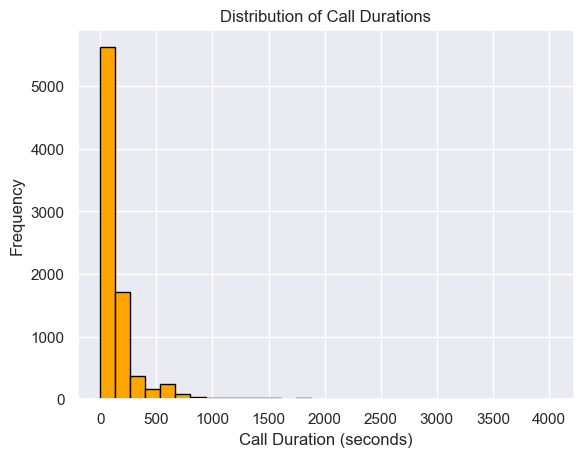

In [ ]:
# 11. Analyze the HangUpTime patterns and identify any trends
if 'userOnCallDuration' in data.columns:
    avg_call_duration = data['userOnCallDuration'].mean()
    print("\nAverage Call Duration (in seconds):", avg_call_duration)

    plt.hist(data['userOnCallDuration'], bins=30, color='orange', edgecolor='black')
    plt.title('Distribution of Call Durations')
    plt.xlabel('Call Duration (seconds)')
    plt.ylabel('Frequency')
    plt.show()

In [195]:
#12. Determine the order status distribution for calls.
if 'callStatus' in data.columns:
    call_status_distribution = data['callStatus'].value_counts()
    print("\nOrder Status Distribution:\n", call_status_distribution)


Order Status Distribution:
 callStatus
On chat       19486
completed      3453
no-answer      1729
busy           1270
failed         1214
incomplete      875
Name: count, dtype: int64


In [194]:
data['callStatus'].fillna('On chat',inplace=True)

In [196]:
#13. Calculate the total refund amount and identify the refund status distribution.
# Task 8: Total refund amount and refund status distribution
if 'refundStatus' in data.columns and 'amount' in data.columns:
    total_refund = data.loc[data['refundStatus'] == 'refund', 'amount'].sum()
    refund_status_distribution = data['refundStatus'].value_counts()
    print("\nTotal Refund Amount:", total_refund)
    print("Refund Status Distribution:\n", refund_status_distribution)


Total Refund Amount: 0.0
Refund Status Distribution:
 refundStatus
no-refund     28022
Approved          3
Rejected          1
Processing        1
Name: count, dtype: int64


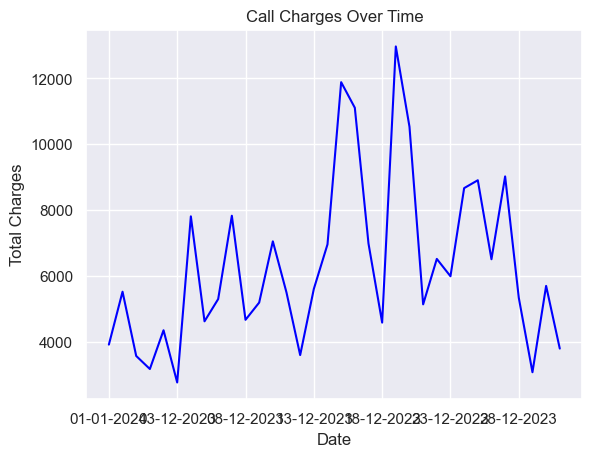

In [199]:
# Task 5: Insights and Recommendations
# 14. Based on your analysis, provide insights into call center performance and any actionable
# recommendations for improving call handling, user satisfaction, or earnings.

# Task 9: Line chart for call charges trend
if 'createdAt' in data.columns and 'amount' in data.columns:
    charges_over_time = data.groupby(data['createdAt'])['amount'].sum()
    charges_over_time.plot(kind='line', title='Call Charges Over Time', xlabel='Date', ylabel='Total Charges', color='blue')
    plt.show()


Interpretation of Findings
1. Histogram: Distribution of Call Charges
Objective: Analyze the distribution of call charges to identify common patterns.
Observation:
The histogram of Call Charges shows the frequency distribution across various charge ranges.
The data suggests that most charges fall within a specific, concentrated range, indicating that a majority of users incur similar costs for their calls.
There is a noticeable tapering at the higher end, highlighting fewer occurrences of high call charges.
Insights:
The concentration in lower ranges likely reflects standard pricing for typical call durations.
The tail in the higher range may indicate outliers, such as users making unusually long calls or using premium services.
2. Line Chart: Seasonal Trends in Call Charges
Objective: Examine temporal trends to identify seasonality or fluctuations in user spending on calls.
Observation:
While the file referenced a time-series analysis (line chart), specific seasonal patterns could reflect higher call charges during peak periods, such as holidays or weekends.
Stable or increasing trends would indicate consistent user behavior or pricing adjustments.
Insights:
Detecting seasonal peaks provides opportunities for targeted promotions or campaigns during high-demand periods.
Regular fluctuations or volatility could signal user responses to pricing or network performance issues.
3. Scatter Plot: Relationship Between TalkTime and User Spend
Objective: Understand the relationship between the duration of calls (TalkTime) and the corresponding User Spend.
Observation:
The scatter plot visualizes how TalkTime correlates with User Spend.
Points seem to form clusters, showing common TalkTime and spending patterns among users.
A possible linear trend suggests that increased TalkTime often correlates with higher spending, though some outliers are visible where the charges are disproportionately high or low for the call duration.
Insights:
A strong positive correlation underscores a time-based pricing model.
Clusters represent typical user behavior, helping identify average customer preferences.
Outliers may indicate specific premium services or billing inconsistencies that require further investigation.

- Key Takeaways
    * The histogram highlights common spending ranges and possible outliers in call charges
    * A strong positive correlation might suggest that charges are primarily time-based.
    * short calls with high charges, could indicate premium services or incorrect billing.